# HW 6 

For this homework, we have collected the monthly average data for Methane from the website : [Global Monitoring Laboratory]( https://gml.noaa.gov/dv/data/). Tge data available on this website is in .txt format. The file is  uploaded for this analysis below. 

Used pycodestyle magic for linting. It worked fine mostly. But some lines are too long but I am unable to short it ( to avoid getting errors)

In [49]:
%load_ext pycodestyle_magic
%pycodestyle_on

## Imports 
We used Pandas for the plotting , other necessary imports are given below:

In [50]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize

For our HW we only need the 3 columns data . These are column for Time( in decimal), values and Std in values. 

In [53]:
df = pd.read_csv('ch4.txt', skiprows=139, usecols=['time_decimal', 'value', 'value_std_dev'], sep=" ", na_values=[-999.99, -99.99])
print(df.dropna())

1:80: E501 line too long (131 > 79 characters)


     time_decimal    value  value_std_dev
3     1987.246575  1697.19          11.82
4     1987.328767  1699.50          13.03
5     1987.413699  1693.40          12.65
6     1987.495890  1678.06          11.77
7     1987.580822  1674.99          13.44
..            ...      ...            ...
403   2020.581967  1878.27          11.04
404   2020.666667  1887.81          14.55
405   2020.748634  1900.50          13.36
406   2020.833333  1911.68          19.13
407   2020.915301  1912.50          15.12

[405 rows x 3 columns]


Plotting the Values for emission (in ppb) vs year (according to monthly data ) . From the table imported, taking x values as "Data" column and y values as "Year" column.

In [55]:
x = df.dropna()['time_decimal']
x

3      1987.246575
4      1987.328767
5      1987.413699
6      1987.495890
7      1987.580822
          ...     
403    2020.581967
404    2020.666667
405    2020.748634
406    2020.833333
407    2020.915301
Name: time_decimal, Length: 405, dtype: float64

In [58]:
y = df.dropna()['value']
y

3      1697.19
4      1699.50
5      1693.40
6      1678.06
7      1674.99
        ...   
403    1878.27
404    1887.81
405    1900.50
406    1911.68
407    1912.50
Name: value, Length: 405, dtype: float64

The plot of the Mithane emmision per time decimal is given below:

Text(0.5, 1.0, 'CH4 emission')

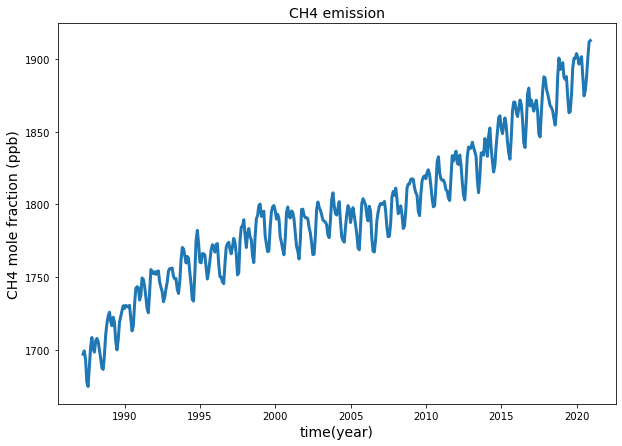

In [62]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(x, y, lw=3)
ax.set_xlabel('time(year)', fontsize=14)
ax.set_ylabel('CH4 mole fraction (ppb)', fontsize=14)
ax.set_title('CH4 emission', fontsize=14)

From the plot, we can see that the methane emmisions has been in increase . Though every month the rate is different but after end of each year ,its increasing slowly. 

## Fitting the data with  exp 

The following codes (chi_square_fit) are taken from our in class practice . I had to trun of linting because it was giving some kind of errors which I am not sure of .

In [66]:
%pycodestyle_off

import numpy as np

def chi_square_fit(x, y, err):
    n = len(x)
    if n < 2 :
        print ('Error! Need at least 2 data points!')
        exit()
    S = np.sum(1/err**2)
    if abs(S) < 0.00001 :
        print ('Error! Denominator S is too small!')
        exit()
    S_x = np.sum(x/err**2)
    S_y = np.sum(y/err**2)
    t = (x - S_x/S) / err
    S_tt = np.sum(t**2)
    if abs(S_tt) < 0.00001 :
        print ('Error! Denominator S is too small!')
        exit()
    b = np.sum(t*y/err) / S_tt
    a = (S_y - S_x * b) / S
    sigma_a2 = (1 + S_x**2/S/S_tt) / S
    sigma_b2 = 1/S_tt
    if sigma_a2 < 0.0 or sigma_b2 < 0.0 :
        print ('Error! About to pass a negative to sqrt')
        exit()
    sigma_a = np.sqrt(sigma_a2)
    sigma_b = np.sqrt(sigma_b2)
    chi_square = np.sum(((y - a - b*x) / err)**2)
    return(a, b, sigma_a, sigma_b, chi_square)
%pycodestyle_on

Using our data from problem 1 ,We will try to get exponential fit for this data. But we can write any Exponential form : $ y = ae^{bx} $ as follows: \
$ ln y =  bx + ln a $ , which is in a for of y = bx +a \
We are going to use the linear fit function used in the  class. The codes are taken from [Github Repository](https://github.com/ubsuny/CompPhys/DataAnalysis/Fitting/chi_square_fit.py) used in classroom.

Besides the values for x and y , we also need the uncertainities(err) for our fit:

In [68]:
err = df.dropna()['value_std_dev']
err

3      11.82
4      13.03
5      12.65
6      11.77
7      13.44
       ...  
403    11.04
404    14.55
405    13.36
406    19.13
407    15.12
Name: value_std_dev, Length: 405, dtype: float64

Using chi square fit we get the values of our constant a , b .

In [70]:
[a, b, sigma, sigma_a, sigma_b] = chi_square_fit(x, y, err)
fit = a + b * x

Lets plot our fit and the actual data 

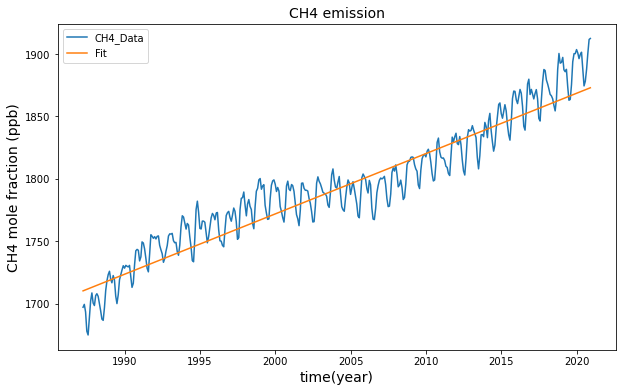

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label="CH4_Data")
ax.plot(x, fit, '-', label="Fit")
ax.set_xlabel('time(year)', fontsize=14)
ax.set_ylabel('CH4 mole fraction (ppb)', fontsize=14)
ax.set_title('CH4 emission', fontsize=14)
ax.legend()

Looks like our fit is giving a fair  estimation of how the emision is growing each year. 

## Goodness of fit

We will  check the goodness of fit with our model. Using stats from scipy we get p_values as follows:

Text(0.5, 1.0, 'CH4 emission')

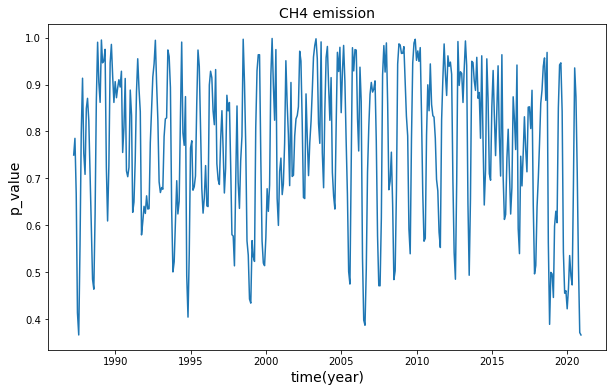

In [76]:
import scipy.stats as stats
# perform Chi-Square Goodness of Fit Test
chisq, p_value = stats.chisquare(f_obs=[x, fit], f_exp=[x, y])
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, p_value, label="Data")
ax.set_xlabel('time(year)', fontsize=14)
ax.set_ylabel('p_value', fontsize=14)
ax.set_title('CH4 emission', fontsize=14)

From the goodness of fit we can see that our model gives a fair estimate of the expected result. For any year this model goodness is between 0.3 to 1 .